<a href="https://colab.research.google.com/github/cihan063/OpenCV-Face_Recognition/blob/master/face_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install cmake dlib face_recognition numpy opencv-python

     |████████████████████████████████| 100.2MB 31kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566172 sha256=4f46d67a43abee9f2b536361715438f9aad30887abed51d8be9911a708270f0a
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [2]:
from google.colab import drive
drive.mount('/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive/


In [3]:
%pwd

'/content'

In [4]:
%ls

ls: cannot access 'drive': Transport endpoint is not connected
drive/  sample_data/


In [5]:
%cd sample_data

/content/sample_data


In [6]:
import cv2
from google.colab.patches import cv2_imshow

In [10]:
image = cv2.imread('bill gates.jpg')

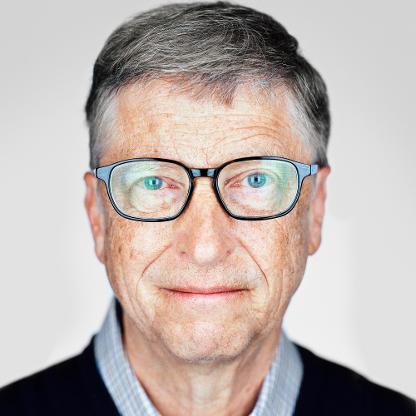

In [11]:
cv2_imshow(image)

In [12]:
cv2.imwrite('abc.jpg',image)

True

In [13]:
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

In [14]:
HSV = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)

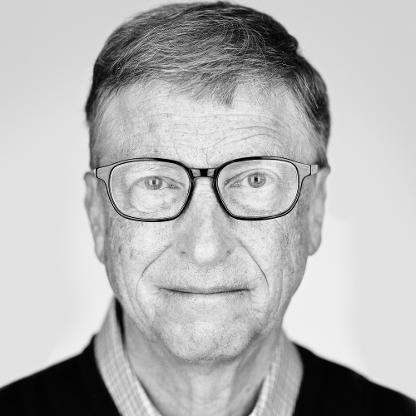

In [15]:
cv2_imshow(gray)

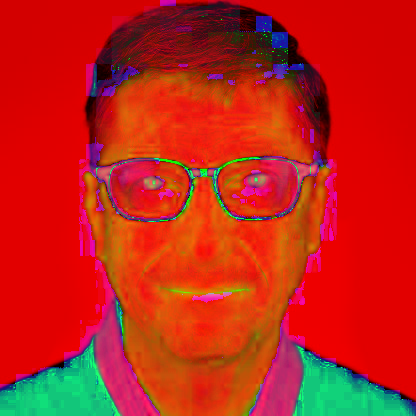

In [16]:
cv2_imshow(HSV)

In [17]:
dimensions= image.shape
print(dimensions)

height= image.shape[0]
weight= image.shape[1]
channels= image.shape[2]
print(height,weight, channels)

(416, 416, 3)
416 416 3


In [18]:
image.shape

(416, 416, 3)

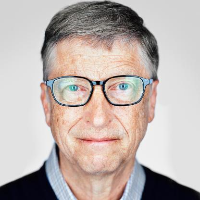

In [19]:
img= cv2.resize(image,(200,200))
cv2_imshow(img)

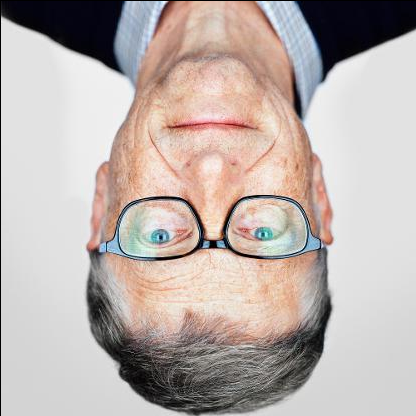

In [20]:
rows,cols=image.shape[:2]
M=cv2.getRotationMatrix2D((cols/2,rows/2),180,1)
dst= cv2.warpAffine(image,M,(cols,rows))
cv2_imshow(dst)

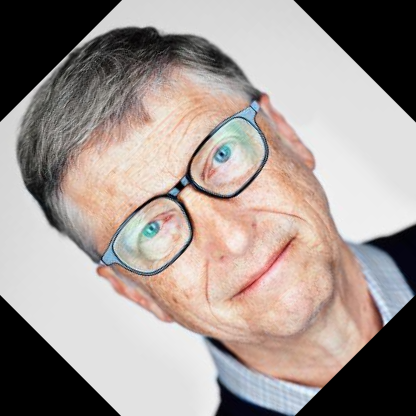

In [21]:
import imutils
rot1= imutils.rotate(image,angle=45)
cv2_imshow(rot1)

In [22]:
import numpy as np

In [23]:
M=np.float32([[1,1,20],[0,1,0]])



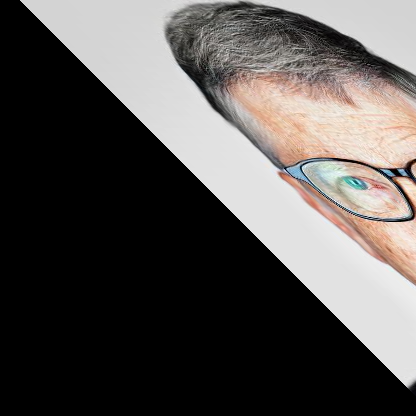

In [24]:
dst=cv2.warpAffine(image,M,(cols,rows))
cv2_imshow(dst)

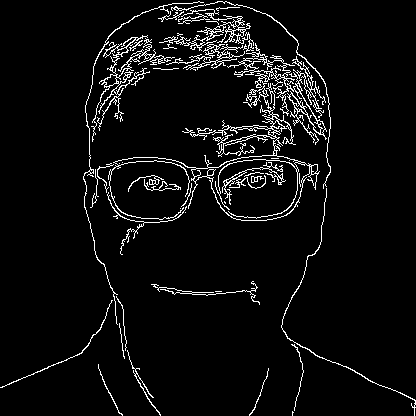

In [25]:
edge=cv2.Canny(image,50,500)
cv2_imshow(edge)

## **Face Recognation**




In [26]:
import face_recognition
import cv2
from google.colab.patches import cv2_imshow

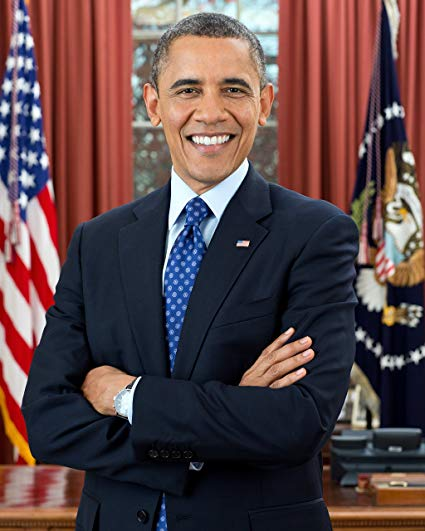

In [27]:
image1= cv2.imread("obama.jpg")
cv2_imshow(image1)

In [28]:
img= face_recognition.load_image_file("obama.jpg")
loc=face_recognition.face_locations(image1)

In [29]:
loc

[(56, 259, 163, 151)]

In [30]:
 cv2.rectangle(image1,(151,56),(259,163),(255,0,0),2)
 cv2.putText(image1,"Obama",(151,66),cv2.FONT_HERSHEY_SIMPLEX,0.5,(255,255,255),2)

array([[[ 25,  29,  88],
        [ 20,  24,  82],
        [ 16,  24,  77],
        ...,
        [ 48,  53, 138],
        [ 62,  67, 158],
        [ 84,  86, 186]],

       [[ 25,  29,  88],
        [ 20,  24,  82],
        [ 16,  24,  77],
        ...,
        [ 48,  53, 138],
        [ 62,  67, 158],
        [ 83,  85, 185]],

       [[ 25,  29,  88],
        [ 20,  24,  82],
        [ 16,  23,  78],
        ...,
        [ 49,  54, 139],
        [ 63,  68, 159],
        [ 83,  85, 185]],

       ...,

       [[ 23,  65, 112],
        [ 22,  64, 111],
        [ 22,  62, 110],
        ...,
        [ 40,  72, 113],
        [ 40,  72, 113],
        [ 31,  63, 104]],

       [[ 37,  84, 135],
        [ 36,  83, 134],
        [ 37,  82, 133],
        ...,
        [ 28,  66, 108],
        [ 28,  66, 108],
        [ 23,  58, 101]],

       [[ 32,  79, 130],
        [ 31,  78, 129],
        [ 32,  77, 128],
        ...,
        [ 20,  58, 100],
        [ 20,  58, 100],
        [ 16,  51,  94]]

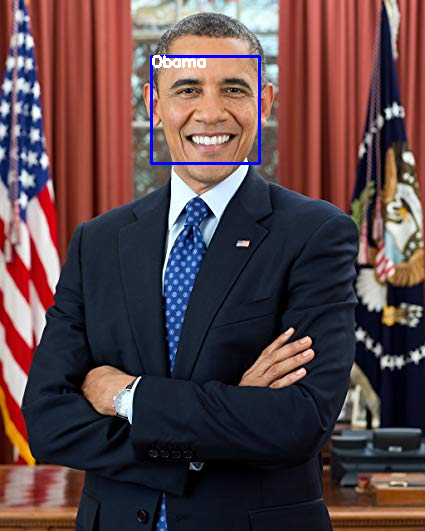

In [31]:
cv2_imshow(image1)

## Finding Features

In [32]:
features = face_recognition.face_landmarks(img)
features

[{'bottom_lip': [(236, 135),
   (228, 146),
   (218, 152),
   (210, 153),
   (202, 153),
   (192, 148),
   (184, 137),
   (186, 138),
   (203, 146),
   (210, 147),
   (218, 146),
   (233, 136)],
  'chin': [(158, 94),
   (159, 107),
   (160, 122),
   (163, 135),
   (168, 149),
   (176, 161),
   (185, 172),
   (197, 180),
   (210, 182),
   (223, 179),
   (234, 170),
   (244, 158),
   (252, 147),
   (257, 134),
   (259, 120),
   (260, 107),
   (261, 94)],
  'left_eye': [(180, 93),
   (185, 90),
   (191, 89),
   (197, 92),
   (191, 93),
   (185, 93)],
  'left_eyebrow': [(169, 89), (174, 82), (183, 78), (193, 78), (203, 81)],
  'nose_bridge': [(211, 90), (211, 98), (211, 107), (211, 116)],
  'nose_tip': [(198, 121), (204, 123), (210, 124), (217, 122), (223, 121)],
  'right_eye': [(224, 92),
   (230, 89),
   (236, 89),
   (241, 92),
   (236, 93),
   (230, 93)],
  'right_eyebrow': [(219, 80), (228, 78), (238, 77), (247, 81), (252, 88)],
  'top_lip': [(184, 137),
   (192, 133),
   (203, 132),


In [33]:
known = face_recognition.load_image_file("obama.jpg")
unknown = face_recognition.load_image_file("donald trump.jpg")
 
known_en = face_recognition.face_encodings(known)[0]
unknown_en = face_recognition.face_encodings(unknown)[0]

In [34]:
known_en

array([-0.08755378,  0.10773162,  0.0199961 , -0.05550656,  0.00843567,
       -0.02576592, -0.09307694, -0.09897818,  0.18704212, -0.1000862 ,
        0.24658173,  0.08732009, -0.19639616, -0.15189512,  0.05653508,
        0.112624  , -0.17974785, -0.07726265, -0.09125439, -0.10767138,
        0.03024912, -0.00941967,  0.09719739,  0.04354377, -0.13638082,
       -0.33909184, -0.0702142 , -0.18656202, -0.00325657, -0.0990544 ,
       -0.09149964,  0.00915548, -0.17392002, -0.11894089,  0.02451813,
       -0.01649232,  0.01257185,  0.00997085,  0.20941307,  0.03357463,
       -0.12165179,  0.08693292,  0.01815109,  0.21104325,  0.29289907,
        0.08263068, -0.00823482, -0.09162933,  0.11692941, -0.21978231,
        0.0751473 ,  0.15613879,  0.089628  ,  0.03603169,  0.08901367,
       -0.18280581, -0.00181068,  0.08707272, -0.15427919,  0.0143808 ,
        0.01167029, -0.08415167, -0.04811294,  0.04439957,  0.20771661,
        0.11962169, -0.11982585, -0.04726069,  0.13824473, -0.03

In [35]:
results = face_recognition.compare_faces([known_en],unknown_en)
results

[False]

In [36]:
distance = face_recognition.face_distance([known_en],unknown_en)
distance

array([0.8871494])

## **Multiple Face Detection**

In [41]:
import face_recognition as fr
import cv2
import os, shutil
import numpy as np
from google.colab.patches import cv2_imshow

In [49]:
def get_encoded_faces():
  encoded = {}
  for dirpath, dname, fname in os.walk("./faces"): 
    for f in fname:
      if f.endswith(".jpg") or f.endswith(".png"):
        face = fr.load_image_file("faces/"+ f)
        encoding = fr.face_encodings(face)[0]
        encoded[f.split(".")[0]]= encoding
  return encoded

In [50]:
x= get_encoded_faces()

In [51]:
x

{'bill gates': array([-1.09242789e-01,  8.21418688e-02,  7.65005052e-02,  6.61844909e-02,
        -1.28447220e-01, -1.63727067e-02, -3.78345400e-02, -1.36183247e-01,
         7.96160772e-02, -7.91553110e-02,  1.51076883e-01, -3.59641388e-03,
        -2.94623017e-01, -4.50880341e-02, -3.35343927e-03,  9.38964114e-02,
        -1.39286101e-01, -2.60703359e-02, -1.32537678e-01, -1.34456187e-01,
        -7.26950467e-02,  4.36590090e-02,  9.14684534e-02, -5.10342084e-02,
        -1.27527982e-01, -2.26599604e-01, -1.22815788e-01, -1.44408152e-01,
         9.78628248e-02, -7.78549910e-02,  5.95754609e-02,  7.56762326e-02,
        -1.51305482e-01, -6.27584308e-02, -4.00074422e-02,  1.29633024e-01,
        -6.25612140e-02, -2.44695693e-04,  2.06270322e-01, -5.42277955e-02,
        -1.53745309e-01,  2.16158703e-02,  3.60562876e-02,  2.58191288e-01,
         2.49448314e-01,  2.66997628e-02, -2.11072117e-02, -4.87494469e-02,
         1.47649214e-01, -2.88828075e-01,  6.55567050e-02,  1.13887683e-01

In [68]:
def classify_face(im):
  faces = get_encoded_faces()
  faces_encoded = list(faces.values())
  known_face_names = list(faces.keys())

  img = cv2.imread(im)
  face_locations = fr.face_locations(img)
  unknown_face_encodings= fr.face_encodings(img,face_locations)

  face_names= []
  for face_encoding in unknown_face_encodings:
    name="Unknown"
    matches=fr.compare_faces(faces_encoded,face_encoding)

    face_distances = fr.face_distance(faces_encoded,face_encoding)
    best_match_index = np.argmin(face_distances)
    if matches[best_match_index]:
      name = known_face_names[best_match_index]
    
    face_names.append(name)
    for(top, right,bottom,left), name in zip(face_locations, face_names):
      cv2.rectangle(img,(left-20,top-20),(right+20,bottom+20),(255,0,0),2)
      cv2.rectangle(img,(left-20,bottom-15),(right+20,bottom+20),(255,0,0),cv2.FILLED)
      cv2.putText(img,name,(left-20,bottom+15),cv2.FONT_HERSHEY_DUPLEX, 0.5,(255,255,255),1)

  while True:
    cv2_imshow(img)
    return face_names




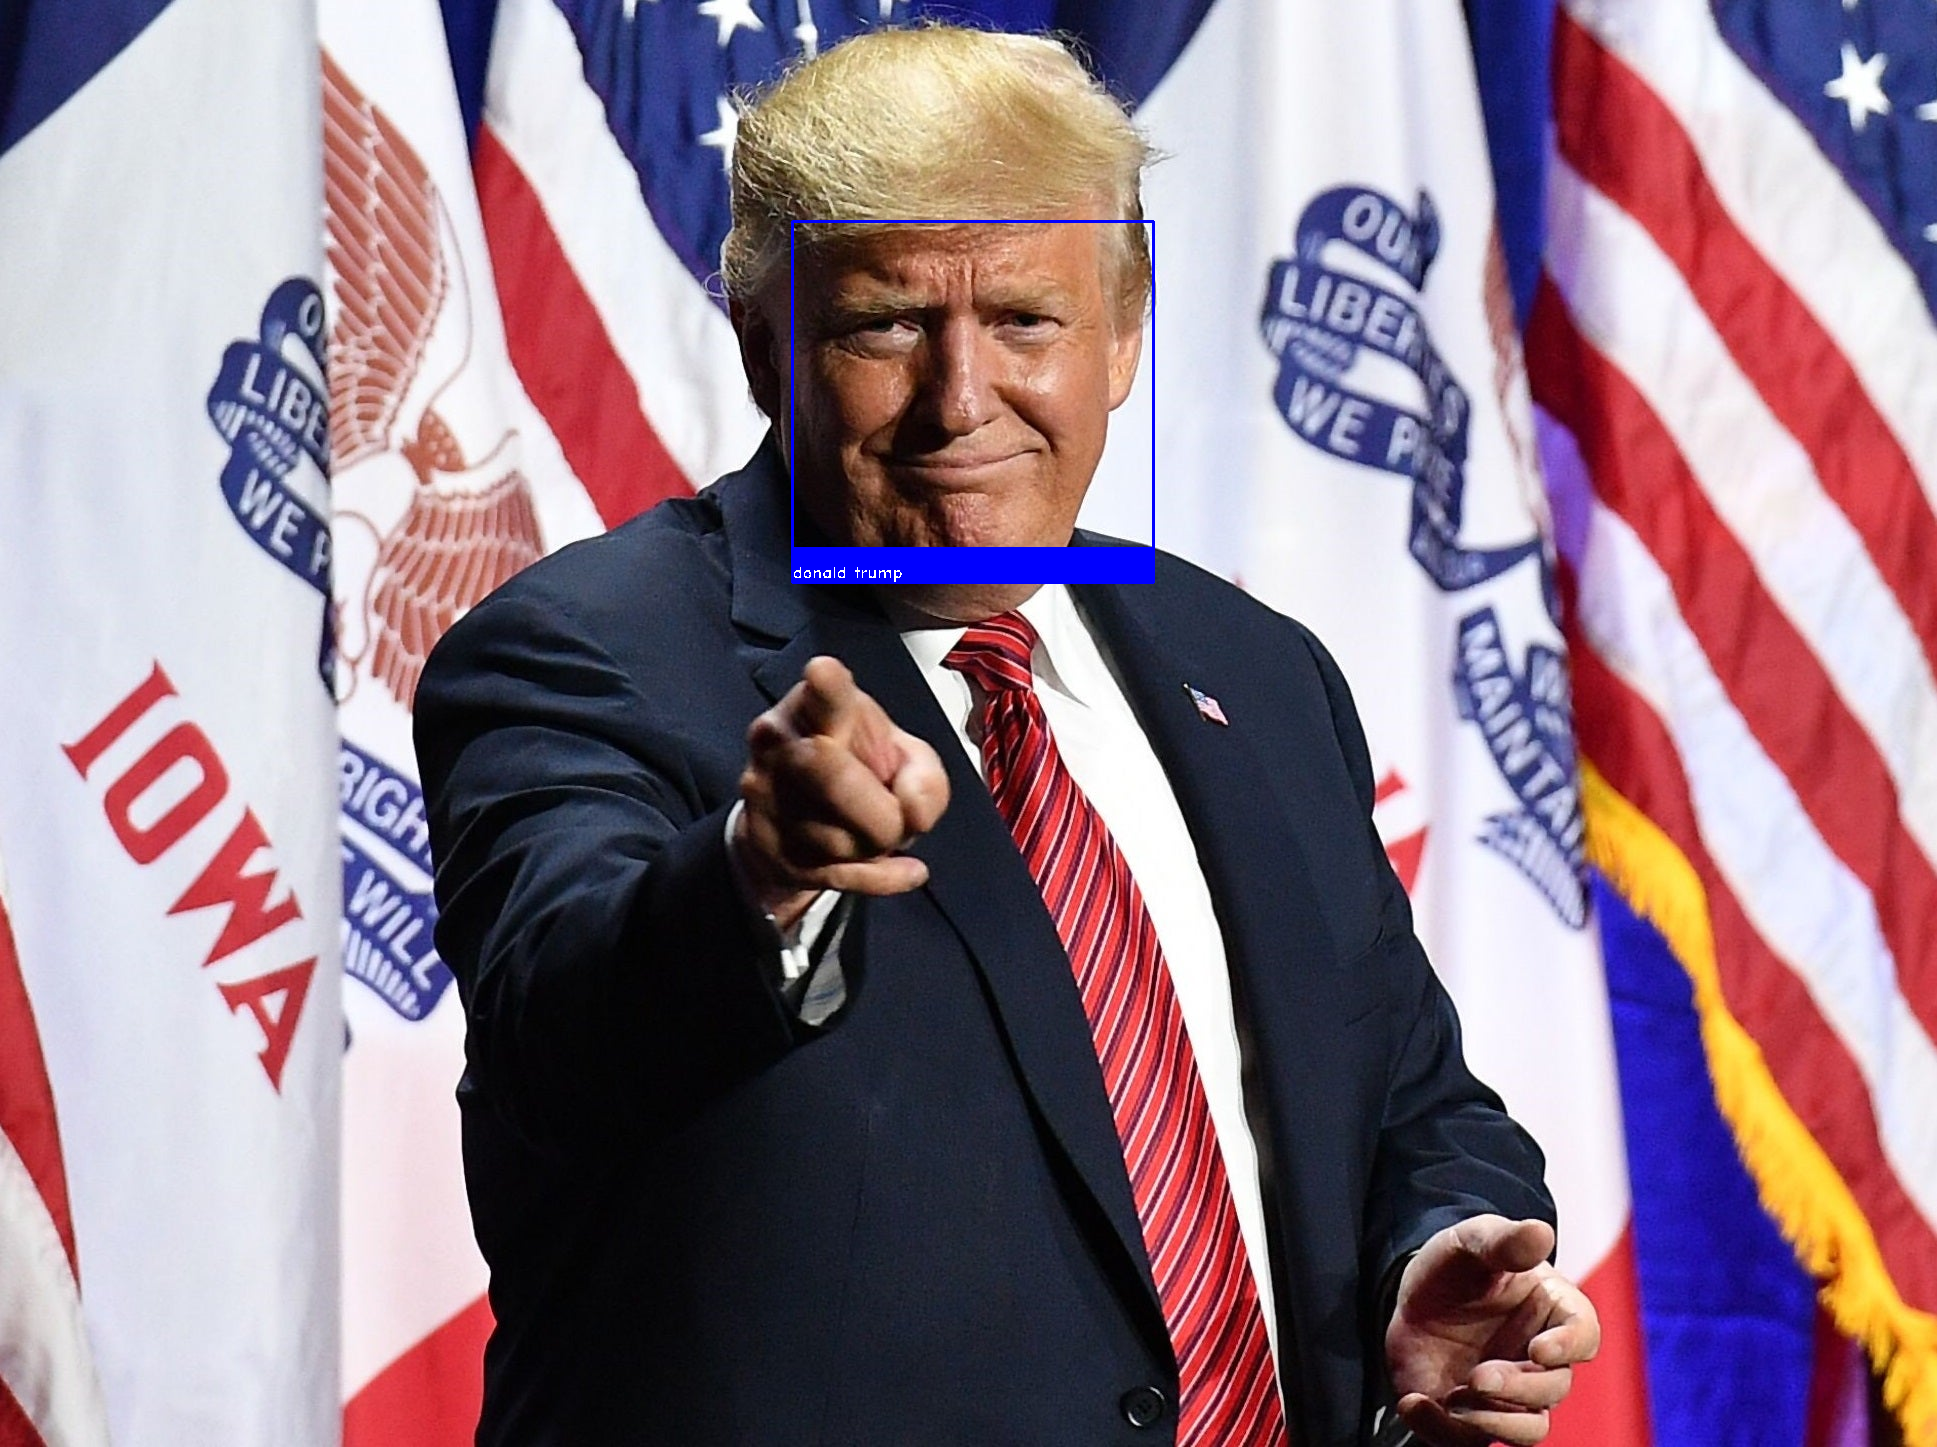

['donald trump']

In [69]:
classify_face("test2.jpg")

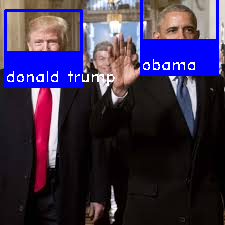

['obama', 'donald trump']

In [71]:
classify_face("test.jpg")